In [511]:
import numpy as np
import pandas as pd
import os
import matplotlib as plt
import seaborn as sb
import copy

In [479]:
os.getcwd()

'C:\\Users\\ASUS\\Documents\\exo_base_python_data_ia'

In [480]:
os.chdir('C:\\Users\\ASUS\\Documents\\exo_base_python_data_ia')

In [514]:
# 1. Importez le fichier de données “coeur” dans dans votre notebook à l’aide de
# pandas et stockez le dans un objet appelé “data”.

data = pd.read_excel('Coeur.xlsx')
data

TypeError: 'module' object is not callable

In [503]:
# 2. Faites une copie de l’objet “data” dans un nouvel objet appelé “df”

df = data
data

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140.0,289.0,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160.0,180.0,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130.0,283.0,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138.0,214.0,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150.0,195.0,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,NaN,264.0,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,NaN,193.0,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,NaN,131.0,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,NaN,236.0,0,LVH,174,Non,0.0,Plat,1


In [504]:
# 3. Ecrire une fonction qui reçoit en entrée un DataFrame et qui nous retourne deux
# listes ; une liste avec le nom des colonnes et une liste avec le type de chaque colonne

def liste_col_type(data_f):
    import pandas as pd
    import numpy as np
    return list(data_f.columns), list(data_f.dtypes)
    
liste_col_type(df)

(['AGE',
  'SEXE',
  'TDT',
  'PAR',
  'CHOLESTEROL',
  'GAJ',
  'ECG',
  'FCMAX',
  'ANGINE',
  'DEPRESSION',
  'PENTE',
  'CŒUR'],
 [dtype('int64'),
  dtype('O'),
  dtype('O'),
  dtype('float64'),
  dtype('float64'),
  dtype('int64'),
  dtype('O'),
  dtype('int64'),
  dtype('O'),
  dtype('float64'),
  dtype('O'),
  dtype('int64')])

In [505]:
# 4. Ecrire une fonction qui permet de recoder la variable catégorielle sexe.

def recode_simple(data_f, homme = "homme", femme = "femme"):
    return data_f["SEXE"].replace({"homme":homme, "femme":femme}, inplace = True)

recode_simple(df, homme = "h", femme = "f")
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,h,AA,140.0,289.0,0,Normal,172,Non,0.0,Ascendant,0
1,49,f,DNA,160.0,180.0,0,Normal,156,Non,1.0,Plat,1
2,37,h,AA,130.0,283.0,0,ST,98,Non,0.0,Ascendant,0
3,48,f,ASY,138.0,214.0,0,Normal,108,Oui,1.5,Plat,1
4,54,h,DNA,150.0,195.0,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,h,AT,NaN,264.0,0,Normal,132,Non,1.2,Plat,1
914,68,h,ASY,NaN,193.0,1,Normal,141,Non,3.4,Plat,1
915,57,h,ASY,NaN,131.0,0,Normal,115,Oui,1.2,Plat,1
916,57,f,AA,NaN,236.0,0,LVH,174,Non,0.0,Plat,1


In [510]:
# 5. Ecrire une fonction qui permet de recoder toutes les variables catégorielles du DataFrame

def recode_multi(**colonnes): 
    
    m = colonnes.pop(list(colonnes)[0])  # del colonnes[list(colonnes)[0]]
    xy = {j:k for j,k in colonnes.items()}
    m.replace(xy, inplace = True)
    return m

recode_multi(data = df, homme = "h", femme = "f", Normal = "norm")


,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,h,AA,140.0,289.0,0,norm,172,Non,0.0,Ascendant,0
1,49,f,DNA,160.0,180.0,0,norm,156,Non,1.0,Plat,1
2,37,h,AA,130.0,283.0,0,ST,98,Non,0.0,Ascendant,0
3,48,f,ASY,138.0,214.0,0,norm,108,Oui,1.5,Plat,1
4,54,h,DNA,150.0,195.0,0,norm,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,h,AT,NaN,264.0,0,norm,132,Non,1.2,Plat,1
914,68,h,ASY,NaN,193.0,1,norm,141,Non,3.4,Plat,1
915,57,h,ASY,NaN,131.0,0,norm,115,Oui,1.2,Plat,1
916,57,f,AA,NaN,236.0,0,LVH,174,Non,0.0,Plat,1


In [507]:
# 6. Créer un DataFrame dénommé “df_2” qui contient uniquement les hommes qui
# ont une maladie cardiaque en utilisant la fonction “groupby”

def renomme_multi(**colonnes): 
    
    m = colonnes.pop(list(colonnes)[0])  # del colonnes[list(colonnes)[0]]
    
    couple = {j:k for j,k in colonnes.items()}
    m.rename(columns = couple, inplace = True)
    return m

renomme_multi(a = df, PENTE = "PENTE", SEXE = "SEXE")

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,h,AA,140.0,289.0,0,Normal,172,Non,0.0,Ascendant,0
1,49,f,DNA,160.0,180.0,0,Normal,156,Non,1.0,Plat,1
2,37,h,AA,130.0,283.0,0,ST,98,Non,0.0,Ascendant,0
3,48,f,ASY,138.0,214.0,0,Normal,108,Oui,1.5,Plat,1
4,54,h,DNA,150.0,195.0,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,h,AT,NaN,264.0,0,Normal,132,Non,1.2,Plat,1
914,68,h,ASY,NaN,193.0,1,Normal,141,Non,3.4,Plat,1
915,57,h,ASY,NaN,131.0,0,Normal,115,Oui,1.2,Plat,1
916,57,f,AA,NaN,236.0,0,LVH,174,Non,0.0,Plat,1


In [421]:
# 6. Créer un DataFrame dénommé “df_2” qui contient uniquement les hommes qui
#  une maladie cardiaque en utilisant la fonction “groupby”

df.groupby(["SEXE"]).get_group("homme").groupby(["CŒUR"]).get_group(1)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
8,37,homme,ASY,140.0,207.0,0,Normal,130,Oui,1.5,Plat,1
11,58,homme,AA,136.0,164.0,0,ST,99,Oui,2.0,Plat,1
13,49,homme,ASY,140.0,234.0,0,Normal,140,Oui,1.0,Plat,1
16,38,homme,ASY,110.0,196.0,0,Normal,166,Non,0.0,Plat,1
18,60,homme,ASY,100.0,248.0,0,NaN,125,Non,1.0,Plat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
908,63,homme,ASY,140.0,187.0,0,LVH,144,Oui,4.0,Ascendant,1
911,59,homme,ASY,164.0,176.0,1,LVH,90,Non,1.0,Plat,1
913,45,homme,AT,NaN,264.0,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,NaN,193.0,1,Normal,141,Non,3.4,Plat,1


In [422]:
# 7. Faites un tableau de contingence entre la variable “SEXE” et la variable “COEUR”

pd.crosstab(df["SEXE"], df["CŒUR"])      #df[["SEXE", "CŒUR"]].value_counts()

CŒUR,0,1
SEXE,,
femme,143,50
homme,267,458


<AxesSubplot:>

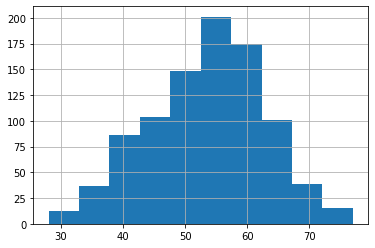

In [423]:
# # 8. Afficher l’histogramme de la variable "ÂGE"

df["AGE"].hist()

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

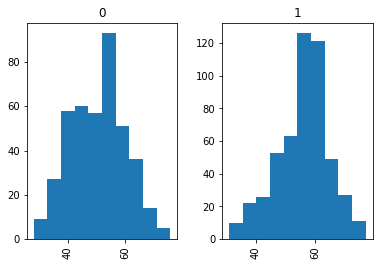

In [424]:
# 9. Afficher l’histogramme de la variable "ÂGE" pour chaque modalité de la variable “COEUR”

df["AGE"].hist(by = df["CŒUR"])

<AxesSubplot:xlabel='AGE', ylabel='DEPRESSION'>

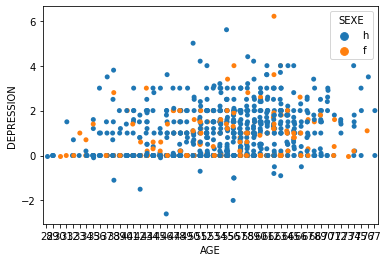

In [705]:
# 10. Affichez le nuage de point entre la variable "ÂGE" et la variable "DÉPRESSION"

sb.stripplot(x="AGE", y="DEPRESSION", hue="SEXE", data=df)
#df.plot.scatter(x = "AGE", y = "DEPRESSION", style = "CŒUR")
#f = pl.scatter(df["AGE"], df["DEPRESSION"])
#show(f)

In [792]:
# 11. Stockez dans "liste qual" les noms des variables qualitatives

qual = ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR']  # la liste des variables qualitaives
quant= ['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION']  # la liste des variables quantitatives


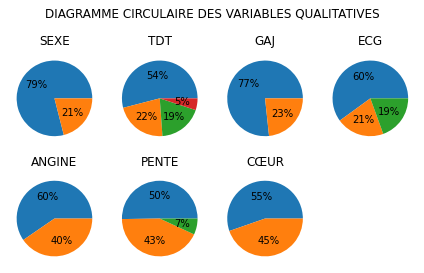

In [832]:
# 12. En utilisant “liste_quant”, faites une représentation graphique de chaque variable
# quantitative en utilisant une boucle for


pl.figure(tight_layout = True)
pl.suptitle("DIAGRAMME CIRCULAIRE DES VARIABLES QUALITATIVES")
for y,x in enumerate(qual):
    eff = df[x].value_counts()
    pl.subplot(2,4,y+1)
    pl.pie(eff, autopct = '%1.0f%%')
    pl.title(f"{qual[y]}")
pl.show()

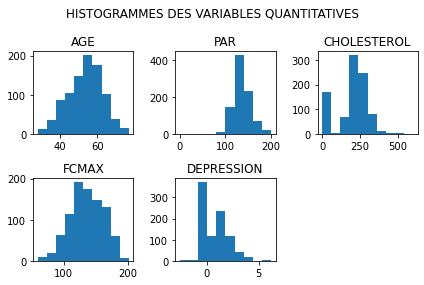

In [833]:
# 13. En utilisant “liste_qual”, faites une représentation graphique de chaque variable
#quantitative en utilisant une boucle for

import matplotlib.pyplot as pl

pl.figure(tight_layout = True)
pl.suptitle("HISTOGRAMMES DES VARIABLES QUANTITATIVES")
for y,x in enumerate(quant):
    pl.subplot(2,3,y+1)
    pl.hist(df[x])
    pl.title(f"{quant[y]}")
pl.show()




In [823]:
list(df["TDT"].unique())

['AA', 'DNA', 'ASY', 'AT']